<h1 align=center><font size=5>Data Science and Machine Learning Capstone Project</font></h1>
<h2 align=center><font size=3; color=blue> Copyright &#169; Mustafizur Rahman</font></h2>

<p><b>MULTI CLASS CLASSIFICATION MODEL FOR BRONX TOP FIVE COMPLAINTS:</b> In this section, I will DEVELOP a classification model using features to predict future Complaint of top five complaint Type</p>

<h4>Import pandas</h4> 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sn
%matplotlib inline 
# importing necessary libraries 
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split


<h2>Import data from previous model where I save Clean data for analysis, visualization and Modeling.</h2>

In [2]:
filename='C:\\Users\\TOPU\Documents\\GitHub\\5. Data Science and Machine Learning Capstone Project\\Bronx_Merged_top5_df.csv'

Use the Pandas method <b>read_csv()</b> to load the data from local drive.

In [3]:
df= pd.read_csv(filename)
df.head()

,Complaint Type,Address,Borough,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,...,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,BldAge,RenvAge
0,1,2405 SOUTHERN BOULEVARD,BX,0.009237,0.092308,0.017513,0.0,0.48,5,0.00037,...,0.386364,0.0,0.009467,0.344,0.0,1970,0,10458.0,0.208333,0.0
1,4,2405 SOUTHERN BOULEVARD,BX,0.009237,0.092308,0.017513,0.0,0.48,5,0.00037,...,0.386364,0.0,0.009467,0.344,0.0,1970,0,10458.0,0.208333,0.0
2,1,2405 SOUTHERN BOULEVARD,BX,0.009237,0.092308,0.017513,0.0,0.48,5,0.00037,...,0.386364,0.0,0.009467,0.344,0.0,1970,0,10458.0,0.208333,0.0
3,1,2405 SOUTHERN BOULEVARD,BX,0.009237,0.092308,0.017513,0.0,0.48,5,0.00037,...,0.386364,0.0,0.009467,0.344,0.0,1970,0,10458.0,0.208333,0.0
4,0,2405 SOUTHERN BOULEVARD,BX,0.009237,0.092308,0.017513,0.0,0.48,5,0.00037,...,0.386364,0.0,0.009467,0.344,0.0,1970,0,10458.0,0.208333,0.0


In [5]:
print(df.columns)
#df.describe(include=['object'])
df.corr()

Index(['Complaint Type', 'Address', 'Borough', 'BldgArea', 'BldgDepth',
       'BuiltFAR', 'CommFAR', 'FacilFAR', 'Lot', 'LotArea', 'LotDepth',
       'NumBldgs', 'NumFloors', 'OfficeArea', 'ResArea', 'ResidFAR',
       'RetailArea', 'YearBuilt', 'YearAlter1', 'ZipCode', 'BldAge',
       'RenvAge'],
      dtype='object')


,Complaint Type,BldgArea,BldgDepth,BuiltFAR,CommFAR,FacilFAR,Lot,LotArea,LotDepth,NumBldgs,NumFloors,OfficeArea,ResArea,ResidFAR,RetailArea,YearBuilt,YearAlter1,ZipCode,BldAge,RenvAge
Complaint Type,1.000000,-0.009860,-0.023631,-0.012431,0.004921,-0.002066,0.007687,-0.007166,-0.016218,-0.002594,-0.013960,-0.005033,-0.009869,-0.005655,-0.006678,-0.005798,-0.006287,-0.013278,-0.016749,-0.007924
BldgArea,-0.009860,1.000000,0.398412,0.407002,-0.014423,0.193757,0.150495,0.715538,0.565613,0.407043,0.634931,0.131638,0.986428,0.175338,0.186937,0.082384,0.085739,-0.052596,-0.233461,0.090100
BldgDepth,-0.023631,0.398412,1.000000,0.157845,-0.024740,0.218130,-0.059454,0.276162,0.532468,0.045406,0.259628,0.065057,0.397719,0.219689,0.150603,0.109747,0.093119,-0.085157,0.050450,0.115903
BuiltFAR,-0.012431,0.407002,0.157845,1.000000,0.002353,0.233140,0.112703,-0.009456,-0.027964,0.243716,0.322825,-0.004585,0.417153,0.225061,0.107389,0.067334,0.076620,-0.113729,0.004089,0.074820
CommFAR,0.004921,-0.014423,-0.024740,0.002353,1.000000,0.120859,0.050419,-0.015441,-0.022537,0.007928,-0.005474,0.008308,-0.022239,0.004354,0.085839,-0.017201,0.048140,-0.035584,0.052092,0.044448
FacilFAR,-0.002066,0.193757,0.218130,0.233140,0.120859,1.000000,0.021211,0.051074,0.057212,-0.056492,0.262145,0.017539,0.197443,0.846442,0.098455,0.003250,0.092772,-0.389442,0.069010,0.089054
Lot,0.007687,0.150495,-0.059454,0.112703,0.050419,0.021211,1.000000,0.097245,0.003995,0.122408,0.079608,0.008754,0.131088,-0.012018,0.279969,0.029162,-0.045596,0.010776,-0.220905,-0.044098
LotArea,-0.007166,0.715538,0.276162,-0.009456,-0.015441,0.051074,0.097245,1.000000,0.601011,0.421076,0.384238,0.338650,0.686655,0.032177,0.098702,0.021934,0.040321,0.021403,-0.190611,0.034445
LotDepth,-0.016218,0.565613,0.532468,-0.027964,-0.022537,0.057212,0.003995,0.601011,1.000000,0.204672,0.368911,0.101466,0.562351,0.038582,0.103598,0.038148,0.008610,0.023932,-0.173728,0.021961
NumBldgs,-0.002594,0.407043,0.045406,0.243716,0.007928,-0.056492,0.122408,0.421076,0.204672,1.000000,0.031754,0.100986,0.402923,-0.060183,0.036176,0.066478,0.011212,0.036603,-0.051630,0.020807


In [4]:
df['Complaint Type'].value_counts()

1    309832
2    168022
3    146425
4    102982
0     95617
Name: Complaint Type, dtype: int64

<p>

select all features for the modeling. Also check the target data type (should be integer, as it is a requirement  by the skitlearn algorithm)</p>
<b>FEATURE SETS:BldgArea	BldgDepth	BuiltFAR	CommFAR	FacilFAR	LotArea	LotDepth	NumBldgs	NumFloors	OfficeArea	ResArea	ResidFAR	RetailArea	BldAge and	RenvAge</b>


In [5]:
feature_cols = ['BldgDepth','BuiltFAR', 'LotDepth', 'NumFloors', 'ResArea', 'BldAge']
X=df[feature_cols]
y=df['Complaint Type']
print(X[0:5])
print(y [0:25])
print ('Feature Set:', X.shape)
print ('Label set:', y.shape)

   BldgDepth  BuiltFAR  LotDepth  NumFloors   ResArea    BldAge
0   0.092308  0.017513    0.0165   0.386364  0.009467  0.208333
1   0.092308  0.017513    0.0165   0.386364  0.009467  0.208333
2   0.092308  0.017513    0.0165   0.386364  0.009467  0.208333
3   0.092308  0.017513    0.0165   0.386364  0.009467  0.208333
4   0.092308  0.017513    0.0165   0.386364  0.009467  0.208333
0     1
1     4
2     1
3     1
4     0
5     3
6     3
7     2
8     3
9     3
10    0
11    3
12    0
13    3
14    0
15    0
16    0
17    2
18    2
19    3
20    1
21    4
22    1
23    4
24    4
Name: Complaint Type, dtype: int64
Feature Set: (822878, 6)
Label set: (822878,)


## Train/Test split

In [7]:
import sklearn
from sklearn.model_selection import train_test_split
#print('sklearn: {}'.format(sklearn.__version__))
# split X and y into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.01, random_state=7)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
print(y.shape)

Train set: (814649, 6) (814649,)
Test set: (8229, 6) (8229,)
(822878,)


<h2 id="pattern_visualization"> XGBoost Multiclass classifier</h2>

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. In the following code snippet, I train a decision tree classifier in scikit-learn.Although XGBoost is among many solutions in machine learning problems, one could find it less trivial to implement its booster for multiclass or multilabel classification as it’s not directly implemented to the Python API XGBClassifier.

<b>To use XGBoost main module for a multiclass classification problem, it is needed to change the value of two parameters: objective and num_class.</b>


In [16]:
import xgboost as xgb
#Split data for the train and test sets and get our dmatrices.
#DMatrix, it is a data interface commonly used as input in XGBoost models, 
#it works well with Pandas dataframes, Numpy arrays, SciPy arrays, CSV files, etc.

dtrain = xgb.DMatrix(data=X_train, label=y_train)
dtest = xgb.DMatrix(data=X_test)

# from xgboost.sklearn import  XGBClassifier
# from sklearn.preprocessing import LabelEncoder
# from sklearn import cross_validation, metrics
# from sklearn.grid_search import GridSearchCV
# n_classes_ = len(np.unique(y_train))
# xgb_model = xgb.XGBClassifier(objective='multi:softmax')
# xgb_params = [{'num_class': n_classes_}]
# xgb_params  = [
#     {    
#     "n_estimators": range(50, 501, 50),
#     }
# ]
# #cv
# cv = cross_validation.StratifiedShuffleSplit(y_train, n_iter=5, test_size=0.3, random_state=42)

# xgb_grid = grid_search.GridSearchCV(xgb_model, xgb_params,cv=cv, n_jobs=-1, verbose=3)
# xgb_grid.fit(X_train, y_train)

Time to set our XGBoost parameters to perform multiclass predictions!

In [17]:
# xgb_params = [{'num_class': n_classes_}]
# xgb_params  = [
#     {    
#     "n_estimators": range(50, 501, 50),
#     }
# ]

params = {
    'max_depth': 20,
    'objective': 'multi:softmax',  # error evaluation for multiclass training
    'num_class': 5,
    'n_gpus': 0
}

<b>Now it’s time to train our model and see how it goes.</b>

In [19]:
xgbst = xgb.train(params, dtrain)
y_pred_xgbst = xgbst.predict(dtest)
print(y_pred_xgbst)

[1. 0. 1. ... 1. 1. 1.]


In [20]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_xgbst))

              precision    recall  f1-score   support

           0       0.39      0.18      0.25       938
           1       0.51      0.80      0.62      3133
           2       0.48      0.40      0.43      1701
           3       0.35      0.29      0.32      1445
           4       0.40      0.13      0.20      1012

    accuracy                           0.47      8229
   macro avg       0.43      0.36      0.36      8229
weighted avg       0.45      0.47      0.44      8229



In [22]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_pred_xgbst))

0.4722323490096002


<h2 id="pattern_visualization"> Confusion Matrix for XGBoost classifier</h2>

[[ 171  366  157  214   30]
 [  62 2492  268  219   92]
 [  73  788  673  144   23]
 [ 105  658  207  417   58]
 [  26  560  105  188  133]]


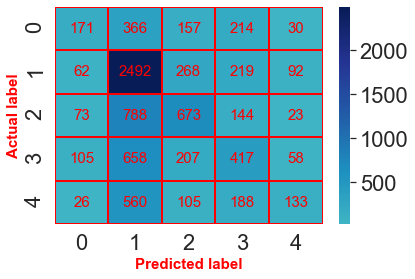

In [24]:
# creating a confusion matrix 
cm_xgboost = confusion_matrix(y_test, y_pred_xgbst)
print(cm_xgboost)
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_xgboost, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> Decision tree Multiclass classifier</h2>

Decision tree classifier is a systematic approach for multiclass classification. It poses a set of questions to the dataset (related to its attributes/features). The decision tree classification algorithm can be visualized on a binary tree. On the root and each of the internal nodes, a question is posed and the data on that node is further split into separate records that have different characteristics. The leaves of the tree refer to the classes in which the dataset is split. In the following code snippet, I train a decision tree classifier in scikit-learn.

In [33]:
from sklearn.tree import DecisionTreeClassifier 
# training a DescisionTreeClassifier 
dtree_model = DecisionTreeClassifier(max_depth = 2).fit(X_train, y_train) 
dtree_predictions = dtree_model.predict(X_test) 
 
# creating a confusion matrix 
cm_dtree = confusion_matrix(y_test, dtree_predictions)

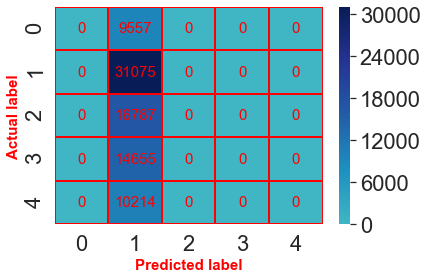

In [34]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_dtree, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

In [35]:
print(classification_report(y_test, dtree_predictions))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      9557
           1       0.38      1.00      0.55     31075
           2       0.00      0.00      0.00     16787
           3       0.00      0.00      0.00     14655
           4       0.00      0.00      0.00     10214

    accuracy                           0.38     82288
   macro avg       0.08      0.20      0.11     82288
weighted avg       0.14      0.38      0.21     82288



C:\Users\TOPU\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


<h2 id="pattern_visualization"> SVM (Support vector machine) Multiclass classifier</h2>
SVM (Support vector machine) is an efficient classification method when the feature vector is high dimensional. In sci-kit learn, we can specify the kernel function (here, linear). To know more about kernel functions and SVM refer – Kernel function | sci-kit learn and SVM.

In [ ]:
# training a linear SVM classifier 
from sklearn.svm import SVC 
#svm_model_linear = SVC(kernel = 'rbf', C = 1,gamma=0.01).fit(X_train, y_train)
svm_model_linear = SVC(kernel = 'linear', C = 1,gamma='auto').fit(X_train, y_train)
svm_predictions = svm_model_linear.predict(X_test) 
  
# model accuracy for X_test   
accuracy = svm_model_linear.score(X_test, y_test) 
print(accuracy)  
# creating a confusion matrix 
cm_svm = confusion_matrix(y_test, svm_predictions)

In [ ]:
print(classification_report(y_test, svm_predictions))

In [ ]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_svm, linewidths=2.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> KNN (k-nearest neighbours) classifier</h2>
KNN or k-nearest neighbours is the simplest classification algorithm. This classification algorithm does not depend on the structure of the data. Whenever a new example is encountered, its k nearest neighbours from the training data are examined. Distance between two examples can be the euclidean distance between their feature vectors. The majority class among the k nearest neighbours is taken to be the class for the encountered example.

In [8]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 7).fit(X_train, y_train) 
  
# accuracy on X_test 
accuracy = knn.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
knn_predictions = knn.predict(X_test)  
cm_knn = confusion_matrix(y_test, knn_predictions) 
print(cm_knn)

0.42374529104386927
[[ 268  284  171  160   55]
 [ 232 2174  333  240  154]
 [ 204  676  612  139   70]
 [ 276  573  204  288  104]
 [ 139  484   98  146  145]]


In [11]:
print(classification_report(y_test, knn_predictions))

              precision    recall  f1-score   support

           0       0.24      0.29      0.26       938
           1       0.52      0.69      0.59      3133
           2       0.43      0.36      0.39      1701
           3       0.30      0.20      0.24      1445
           4       0.27      0.14      0.19      1012

    accuracy                           0.42      8229
   macro avg       0.35      0.34      0.33      8229
weighted avg       0.40      0.42      0.40      8229



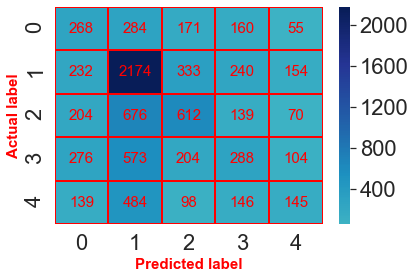

In [12]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_knn, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> Naive Bayes classifier</h2>
Naive Bayes classification method is based on Bayes’ theorem. It is termed as ‘Naive’ because it assumes independence between every pair of feature in the data. 

In [13]:
# training a Naive Bayes classifier 
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB().fit(X_train, y_train) 
gnb_predictions = gnb.predict(X_test) 
  
# accuracy on X_test 
accuracy = gnb.score(X_test, y_test) 
print(accuracy) 
  
# creating a confusion matrix 
cm_nb = confusion_matrix(y_test, gnb_predictions) 

0.2505772268805444


In [15]:
print(classification_report(y_test, gnb_predictions))

              precision    recall  f1-score   support

           0       0.12      0.26      0.17       938
           1       0.37      0.38      0.38      3133
           2       0.21      0.34      0.26      1701
           3       0.00      0.00      0.00      1445
           4       0.16      0.03      0.05      1012

    accuracy                           0.25      8229
   macro avg       0.17      0.20      0.17      8229
weighted avg       0.22      0.25      0.22      8229



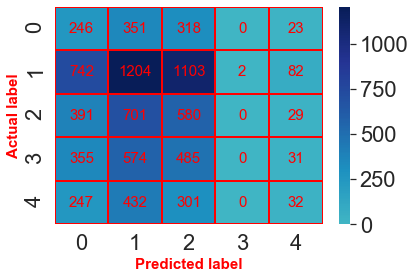

In [14]:
sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cm_nb, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> One-Vs-Rest for Multi-Class Classification</h2>

<p>This is 5 class classifucation problem can be solved using the LogisticRegression algorithm. The strategy for handling multi-class classification can be set via the “multi_class” argument and can be set to “ovr” for the one-vs-rest strategy.</p>

In [26]:
# logistic regression for multi-class classification using built-in one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
# define dataset
#X, y = make_classification(n_samples=822878, n_features=10, n_informative=5, n_redundant=5, n_classes=5, random_state=1)
#X, y = make_classification(n_samples=17000, n_features=10, n_informative=5, n_redundant=5, n_classes=5, random_state=1)
# define model
LR_model = LogisticRegression(multi_class='ovr',solver='lbfgs')
# fit model
LR_model.fit(X_train, y_train)
# make predictions
y_Predict_LGR = LR_model.predict(X_test)

In [27]:
print(y_Predict_LGR)

[1 1 1 ... 1 1 1]


Classification Accuracy: Percentage of correct predication

In [29]:
from sklearn import metrics
print(metrics.accuracy_score(y_test, y_Predict_LGR))

0.38060517681370765


In [30]:
# print the first 25 true and predicted responses
print('True:', y[0:25])
print('Pred:', y_Predict_LGR[0:25])

True: 0     1
1     4
2     1
3     1
4     0
5     3
6     3
7     2
8     3
9     3
10    0
11    3
12    0
13    3
14    0
15    0
16    0
17    2
18    2
19    3
20    1
21    4
22    1
23    4
24    4
Name: Complaint Type, dtype: int64
Pred: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


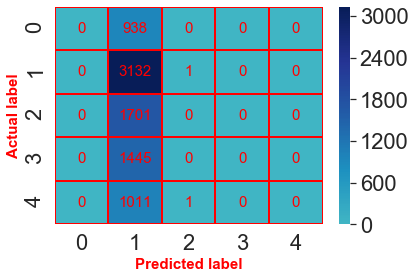

In [31]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline 

# Compute confusion matrix
cnm_logistic = confusion_matrix(y_test, y_Predict_LGR, labels=[0,1,2,3,4])

sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cnm_logistic, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()
#ax.figure.savefig('BrookLyn_Binary.png')

The scikit-learn library also provides a separate OneVsRestClassifier class that allows the one-vs-rest strategy to be used with any classifier.
It is very easy to use and requires that a classifier that is to be used for binary classification be provided to the OneVsRestClassifier as an argument.
Lets use the OneVsRestClassifier class with a LogisticRegression class used as the binary classification model.

In [32]:
# logistic regression for multi-class classification using a one-vs-rest
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
# # define dataset
# X, y = make_classification(n_samples=17000, n_features=10, n_informative=5, n_redundant=5, n_classes=5, random_state=1)
# define model
model = LogisticRegression(solver='lbfgs')
# define the ovr strategy
ovr = OneVsRestClassifier(model)
# fit model
ovr.fit(X_train, y_train)
# make predictions
yhat = ovr.predict(X_test)
print(yhat)

[1 1 1 ... 1 1 1]


In [33]:
#Now we can predict using our test set:
yhat

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [34]:
print(metrics.accuracy_score(y_test, yhat))

0.38060517681370765


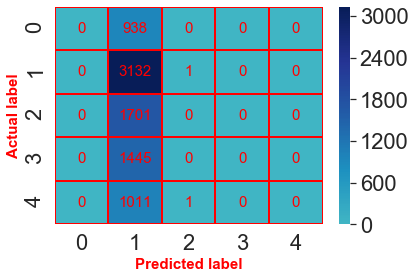

In [35]:
# Compute confusion matrix
cnf_matrix1 = confusion_matrix(y_test, yhat, labels=[0,1,2,3,4])

sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cnf_matrix1, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
clf = OneVsRestClassifier(SVC(gamma='auto')).fit(X, y)
yhat_svm=clf.predict(X)
print(yhat_svm[0:30])

<h2 id="pattern_visualization"> One-Vs-One for Multi-Class Classification</h2>
The support vector machine implementation in the scikit-learn is provided by the SVC class and supports the one-vs-one method for multi-class classification problems. This can be achieved by setting the “decision_function_shape” argument to ‘ovo‘.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier
from sklearn.svm import LinearSVC

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=0)
clf = OneVsOneClassifier(LinearSVC(random_state=0)).fit(X_train, y_train)
yhat_svm_OvO=clf.predict(X_test)
print(yhat[0:30])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [ ]:
cnf_svmOvO = confusion_matrix(y_test, yhat_svm_OvO, labels=[0,1,2,3,4])

sn.set(font_scale=2.0) # for label size
akws = {"size": 15,"ha": 'center',"va": 'center',"color":'red'}
# font size, Horizontal position ('center', 'right', 'left'), 
#Vertical position('top', 'bottom', 'center', 'baseline', 'center_baseline')
ax=sn.heatmap(cnf_svmOvR, linewidths=1.0, linecolor="red",cmap="YlGnBu",center=0, annot=True,fmt="d", annot_kws=akws) 
plt.ylabel('Actual label', fontsize=15,fontweight="bold",color="red")
plt.xlabel('Predicted label', fontsize=15, fontweight="bold",color="red")
plt.show()

<h2 id="pattern_visualization"> Conclusion</h2>
Out of those 7 model XGBoost producesbest results. KNN and SVM also give beteer result (accuracy ~40%)

<hr>
<p>Copyright &copy; 2020 Mustafizur Rahman <a href="https://www.linkedin.com/in/dr-mohammad-rahman-2434b313/">LinkedIn</a>.</p>